<a href="https://colab.research.google.com/github/josefernandezest98/training/blob/main/Fruit_Thresholding/fruit_threshold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fruit Thresholding

In [32]:
# Libraries
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# function: plots an image with MatPlotLib
def show_img(image):
    if len(image.shape)==3:
        img2 = image[:,:,::-1]
        plt.imshow(img2)
        plt.show()
    else:
        img2 = image
        plt.imshow(img2,cmap='gray')
        plt.show()

In [34]:
# Download images and labels
!wget https://raw.githubusercontent.com/josefernandezest98/training/main/Fruit_Thresholding/mandarinas.jpg
!wget https://raw.githubusercontent.com/josefernandezest98/training/main/Fruit_Thresholding/labels_kitti.txt

--2023-09-14 06:07:21--  https://raw.githubusercontent.com/josefernandezest98/training/main/Fruit_Thresholding/mandarinas.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109967 (107K) [image/jpeg]
Saving to: ‘mandarinas.jpg.2’

mandarinas.jpg.2    100%[===================>] 107.39K  --.-KB/s    in 0.002s  

2023-09-14 06:07:21 (42.0 MB/s) - ‘mandarinas.jpg.2’ saved [109967/109967]

--2023-09-14 06:07:21--  https://raw.githubusercontent.com/josefernandezest98/training/main/Fruit_Thresholding/labels_kitti.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaitin

In [35]:
fichero = 'labels_kitti.txt'
df_labels = pd.DataFrame()

with open(fichero) as X:

        for line in X:

            linea = line.split(" ")
            x_min = float(linea[4])
            y_min = float(linea[5])
            x_max = float(linea[6])
            y_max = float(linea[7])
            prob = float(linea[-1][:-1])
            inner = pd.DataFrame({'x_min': [x_min], 'y_min': [y_min], 'x_max': [x_max],
                                  'y_max': [y_max]})

            df_labels = pd.concat([df_labels,inner],ignore_index=True)

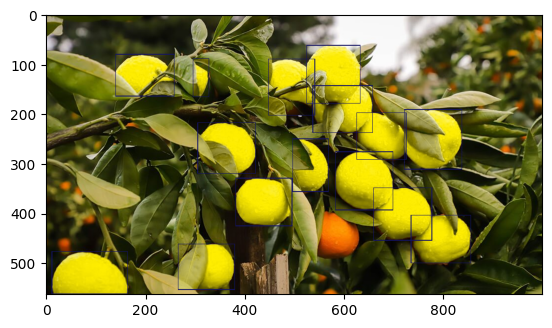

In [36]:
for _, r in df_labels.iterrows():

        x_min = round(r['x_min'])
        x_max = round(r['x_max'])
        y_min = round(r['y_min'])
        y_max = round(r['y_max'])
        image_cv = cv2.rectangle(image_cv,(int(x_min),int(y_min)), \
                                 (int(x_max),int(y_max)),(100,20,20), \
                                 thickness=1)

show_img(image_cv)


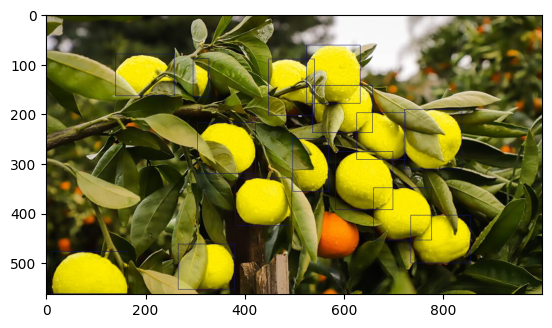

In [26]:
for _, r in df_labels.iterrows():

        x_min = round(r['x_min'])
        x_max = round(r['x_max'])
        y_min = round(r['y_min'])
        y_max = round(r['y_max'])

        bbox = image_cv[y_min:y_max,x_min:x_max]
        hsv_bbox = cv2.cvtColor(bbox, cv2.COLOR_BGR2HSV)

        # mask = cv2.inRange(bbox, (18, 40, 99), (27, 255,255))
        ret, mask = cv2.threshold(bbox[:, :,2], 65, 255, cv2.THRESH_BINARY)

        imask = mask > 0

        indices = np.where(imask==1)
        bbox[indices[0], indices[1], :] = [0, 234, 255]

        hsv_bbox_new = cv2.cvtColor(bbox, cv2.COLOR_BGR2HSV)
        hsv_bbox[indices[0], indices[1], 0] = np.array(hsv_bbox_new[indices[0], indices[1], 0])

        bbox_new = cv2.cvtColor(hsv_bbox, cv2.COLOR_HSV2BGR)
        image_cv[y_min:y_max,x_min:x_max] = bbox_new

show_img(image_cv)